In [7]:
#Importing relevant libraries
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds 
import matplotlib .pyplot as plt

In [8]:
#uploading mnist dataset already exisitng in tensorflow library
mnist_data, mnist_info = tfds.load(name='mnist', with_info = True, as_supervised = True)

mnist_train, mnist_test = mnist_data['train'], mnist_data['test']



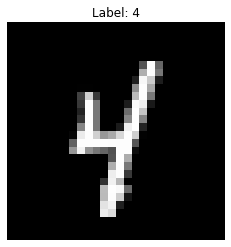

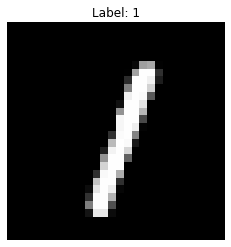

In [9]:
# Get and display the first n images from the training dataset. n=2
num_images_to_display = 2
for image, label in mnist_train.take(num_images_to_display):
    sample_image = image.numpy().squeeze()  # Convert to numpy array and remove singleton dimensions
    sample_label = label.numpy()

    # Display the image using matplotlib
    plt.imshow(sample_image, cmap='gray')
    plt.title(f'Label: {sample_label}')
    plt.axis('off')  # Turn off axis
    plt.show()

In [10]:

#creating the number of validation dataset from the training dataset
num_validation_samples = 0.1*mnist_info.splits['train'].num_examples

#convert number of the validation sample to an integer to prevent potential issue
num_validation_samples = tf.cast(num_validation_samples, tf.int64)

#get the number data point in our  test samples
num_test_samples = mnist_info.splits['test'].num_examples
num_test_samples = tf.cast(num_test_samples, tf.int64)


In [11]:
#scaling the training data 
def scale(image,label):
    image = tf.cast(image, tf.float32)
    image/= 255.
    return image, label

scaled_train_and_validation_data = mnist_train.map(scale)

#using the scale function to scale the test data
test_data = mnist_test.map(scale)

#shuffle the input in batches

BUFFER_SIZE = 10000

shuffle_train_and_validation_data = scaled_train_and_validation_data.shuffle(BUFFER_SIZE)
#create the validation data
validation_data = shuffle_train_and_validation_data.take(num_validation_samples)

#create the train data
train_data = shuffle_train_and_validation_data.skip(num_validation_samples)

#batching the training data

BATCH_SIZE = 100

train_data = train_data.batch(BATCH_SIZE)

#No need to batch the validation and test data(we are not backpropagating on them ). Hence we will take all at once]

validation_data = validation_data.batch(num_validation_samples)

test_data = test_data.batch(num_test_samples)

validation_inputs, validation_targets = next(iter(validation_data))




In [12]:
#Buildimg the model

input_size = 784
output_size = 10
hidden_layer_size = 200


model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28,28,1)),
        tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
        tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
        tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
       
        tf.keras.layers.Dense(output_size, activation='softmax')
        ])

In [13]:
# Choose the Optimizer and the loss function

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [14]:
#number of epoch
NUM_EPOCH = 5

model.fit(train_data, epochs = NUM_EPOCH,validation_data=(validation_inputs, validation_targets), verbose=2)

Epoch 1/5
540/540 - 7s - loss: 0.2638 - accuracy: 0.9229 - val_loss: 0.1355 - val_accuracy: 0.9620 - 7s/epoch - 13ms/step
Epoch 2/5
540/540 - 4s - loss: 0.1040 - accuracy: 0.9679 - val_loss: 0.0877 - val_accuracy: 0.9737 - 4s/epoch - 7ms/step
Epoch 3/5
540/540 - 4s - loss: 0.0710 - accuracy: 0.9782 - val_loss: 0.0789 - val_accuracy: 0.9773 - 4s/epoch - 8ms/step
Epoch 4/5
540/540 - 4s - loss: 0.0521 - accuracy: 0.9833 - val_loss: 0.0615 - val_accuracy: 0.9818 - 4s/epoch - 8ms/step
Epoch 5/5
540/540 - 4s - loss: 0.0420 - accuracy: 0.9863 - val_loss: 0.0596 - val_accuracy: 0.9825 - 4s/epoch - 8ms/step


# Confusion matrix

In [15]:
from sklearn.metrics import confusion_matrix
import seaborn as sns



# Make predictions using the model
predicted_labels = model.predict(validation_targets)
predicted_labels = np.argmax(predicted_labels, axis=1)  # Convert probabilities to class labels

# Compute the confusion matrix
confusion = tf.math.confusion_matrix(validation_inputs, validation_targets)

# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


NameError: name 'predicted_labels' is not defined

In [6]:
#Test the Model

# test_loss, test_accuracy = model.evaluate(test_data)

# print('Test loss: {0:.2f}. Test accuracy:{1:.2f}%'.format(test_loss, test_accuracy*100.))

1/1 [==============================] - 1s 571ms/step - loss: 0.0710 - accuracy: 0.9779
Test loss: 0.07. Test accuracy:97.79%


# Confusion matrix

In [ ]:
GREETINGS: Good morning everyone ? How're you?

WARM -UP: How is the weather? What day is it today?

3-4: My Activity Report (Pg 50).
Small talk: How did you spend your summer vacation? power point presentation

New Words: report, tournament, corner, beginning, ending, they'll, kick(s)
Step 3:  Student wrote a short report about their school activities.

2-2: unit 3 - Read and Think 2(Pg 42)
Small talk: How did you spend your summer vacation? power point presentation

Key Sentence: It is important to use AI effectively.

New words: misunderstand, meaning, Moreover, writer, feeling, feelings, catch, human(s), necessary, effectively, relationship (s), connect, everything, reasons, between, through, bridge.
Key Question: What did Asami ask Ms. Tanaka?

Practice: 
Round 1
Round 2 
Round 3

Grammar for Communication 3: I want your picture.
I want to take your picture.
Let's Try!

1-3 : "All about Me"  Poster (Pg 54-55).

Small talk: How did you spend your summer vacation? power point presentation
New words: poster, starter, tell, comic, movie, other, age, stadium.
Step 1: 
Step 2:
Step 3:
Step 4


2-1:  unit 3 - Read and Think 2(Pg 42)
Small talk: How did you spend your summer vacation? power point presentation

Key Sentence: It is important to use AI effectively.

New words: misunderstand, meaning, Moreover, writer, feeling, feelings, catch, human(s), necessary, effectively, relationship (s), connect, everything, reasons, between, through, bridge.

Key Question: What did Asami ask Ms. Tanaka?


1-1: Unit 5 - Enjoy Communication part 3(pg 52)
Small talk: How did you spend your summer vacation? power point presentation

Key Sentence: I went to the summer festival yesterday.
